**Space X Falcon 9 First Stage Landing Prediction Predictive Analysis**


In this project, I will predict if the Falcon 9 first stage will land successfully. In this notebook, I use my selected variables to build a model that can be used to predict landing success. I will compare several different classification models.

***


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Creating a function to plot the confusion matrix


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

Reading in the dataframe


In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# Dataframe with encoded categorical variables and numberical variables as floats
# These will be used as the predictor variables

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Creating a NumPy array of the class variable to be used as the target variable.


In [ ]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Standardizing X data

In [ ]:
transform = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
X = transform

Splitting data into training and testing sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

There are 18 test samples

In [ ]:
Y_test.shape

(18,)

**Logistic Regression Model**


In [ ]:
# Dictionary of parameters for the grid search
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
# Using a grid search to find  the best parameters
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
# Best hyperparameters and accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Test data accuracy


In [ ]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

Confusion Matrix


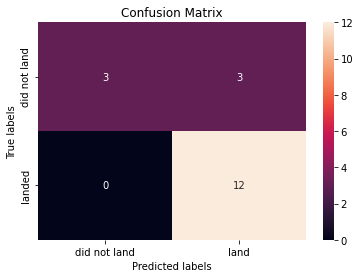

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Logistic regression can distinguish between the different classes. The main issue is false positives (predicting landing when it did not land).


**SVM Model**


In [ ]:
# Dictionary of parameters for the grid search
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
# Using a grid search to find  the best parameters
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
# Best hyperparameters and accuracy
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Test data accuracy


In [ ]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

Confusion matrix


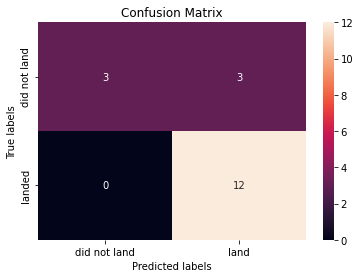

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The SVM model has the same issue with false positives.

**Decision Tree Model**


In [ ]:
# Dictionary of parameters for the grid search
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
# Using a grid search to find  the best parameters
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
# Best hyperparameters and accuracy
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8767857142857143


Test accuracy

In [ ]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

Confusion matrix

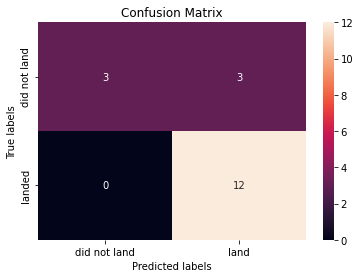

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Once again the issue is false positives. The test accuracy has remained the same.

**KNN Model**


In [ ]:
# Dictionary of parameters for the grid search
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
# Using a grid search to find  the best parameters
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
# Best hyperparameters and accuracy
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Test accuracy

In [ ]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

Confusion Matrix

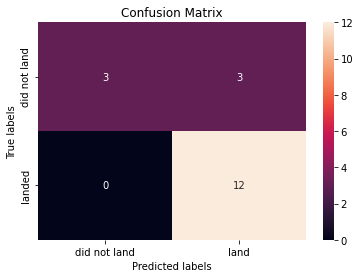

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Once again the issue is false positives. The test accuracy has remained the same.

**Model Comparison**


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [ ]:
LR_yhat = logreg_cv.predict(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(Y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(Y_test, LR_yhat, average='weighted') )

LR Jaccard index: 0.80
LR F1-score: 0.81


In [ ]:
SVM_yhat = svm_cv.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(Y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(Y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.80
SVM F1-score: 0.81


In [ ]:
DT_yhat = tree_cv.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(Y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(Y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.80
DT F1-score: 0.81


In [ ]:
KNN_yhat = knn_cv.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(Y_test, KNN_yhat))
print("KNN F1-score: %.2f" % f1_score(Y_test, KNN_yhat, average='weighted') )

KNN Jaccard index: 0.80
KNN F1-score: 0.81


All models resulted in the same test accuracy. The Decision Tree had the highest training accuracy.

In [ ]:
acc_dict = {
    'model': ["Logistic Regression", "SVM", "Decision Tree", "KNN"], 
    'train_accuracy': [0.84642857, 0.8482142857, 0.876785714, 0.8482142857], 
    'test_accuracy': [0.83333333, 0.83333333, 0.83333333, 0.83333333]
    }
acc_df = pd.DataFrame(acc_dict)
acc_df

,model,train_accuracy,test_accuracy
0,Logistic Regression,0.846429,0.833333
1,SVM,0.848214,0.833333
2,Decision Tree,0.876786,0.833333
3,KNN,0.848214,0.833333


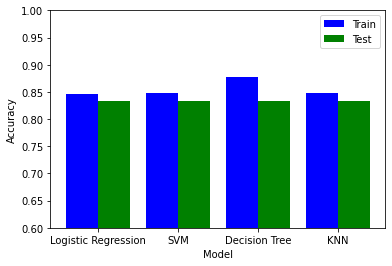

In [ ]:
# Bar chart showing test and training accuracy of various models

import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(4)
y1 = acc_df['train_accuracy']
y2 = acc_df['test_accuracy']
width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x+0.2, y2, width, color='green')
plt.xticks(x, acc_df['model'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.ylim(0.6, 1)
plt.show()

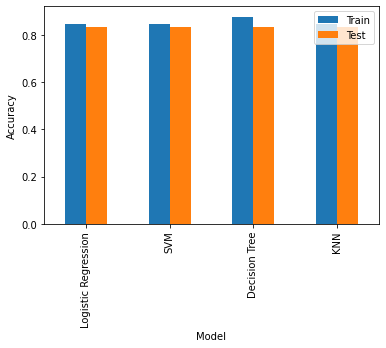

In [ ]:
acc_df.plot(x='model', kind='bar', stacked=False)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.show()

**Conclusion**

LR, SVM, and KNN all had similar training accuracy scores, while the accuracy for the Decision Tree was slightly higher.

All models resulted in the same test accuracy.

It appears the biggest issue we face is false positives. The models are predicting several flights to land that did not land in reality. The models seem to predict flights that landed with good accuracy.

Considering that testing accuracy remained the same across models, I will select the logistic regression model. Our target variable is binary and we will be able to return the probability of a successful landing.

Several factors in a launch are predictive of whether the first stage will land, including flight number, year, booster version, payload mass, orbit, and launch site.

Flight number and year have positive relationships with landing success, as success rate increases as more flights are launched.

Flights with low-middle ranged payload masses seem to have more successful landings.

The booster version, orbit, and launch site used all have an effect on landing success.

Classification modeling is useful in predicting whether the first stage will land with good accuracy.
A logistic regression model can be used to predict the probability that the first stage will land, therefore predicting the probability that the launch will cost more or less.